#### In this lab, we will build and train a Convolutional Neural Network (CNN) using Keras and TensorFlow for the Fashion MNIST dataset, which consists of grayscale images of fashion items. 

Steps: 

#### Import Libraries:
- keras and tensorflow are deep learning libraries.
- matplotlib.pyplot, numpy
- fashion_mnist from keras.datasets to load the Fashion MNIST dataset.
- Sequential, Dense, Dropout, Conv2D, MaxPooling2D, and Flatten are different layers used to build the CNN.

#### Load and Visualize the Dataset:
- Load the Fashion MNIST dataset and define class names.
- Visualize the first 50 images from the training set with their corresponding labels.

#### Preprocess the Data:
- Reshape the images to have a single channel (grayscale) and normalize pixel values to the range [0, 1].
- Convert labels to one-hot encoded vectors.

#### Build the CNN Model:
- Create a sequential model.
- Add two convolutional layers with ReLU activation.
- Add a max-pooling layer to reduce spatial dimensions.
- Add dropout layers to prevent overfitting.
- Flatten the output and add a dense hidden layer with ReLU activation.
- Add another dropout layer.
- Finally, add the output layer with softmax activation for classification.

#### Compile and Train the Model:
- Compile the model using categorical cross-entropy loss and the Adam optimizer.

#### Train the model on the training data for 5 epochs.
- Plot Training History:
- Plot the training and validation loss over epochs.

#### Confusion Matrix:
- Evaluate the model on the validation set and create a confusion matrix.

#### Model Visualization:
- Save an architecture diagram of the model to a file.

#### Misclassified Images:
- Identify and visualize misclassified images from the validation set.

#### Save the Model:
- Save the trained model to a file named 'fashionmnist_cnn.keras'.

Additionaly, we will do a confusion matrix plot function (plot_confusion_matrix) using SKLEARN and plot misclassified images with their predictions and actual labels.

### Import Libraries (keras, tensorflow, numpy, matplotlib) 

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#### from keras libraries, import mnist, Sequential, Dense, Dropout, Conv2D, MaxPooling2D, and Flatten

In [6]:
from keras.datasets import fashion_mnist  
from keras.models import Sequential       
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten  


#### import the fashion_mnist dataset from keras.datasets

In [9]:
from keras.datasets import fashion_mnist


#### Load the data using these variables: (X_train, y_train), (X_valid, y_valid)

In [13]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()


#### select a sample of an image
feel free to use: np.random.randint (0, X_train.shape[0])

In [16]:
sample_index = np.random.randint(0, X_train.shape[0])
sample = X_train[sample_index]


#### Plot the sample image

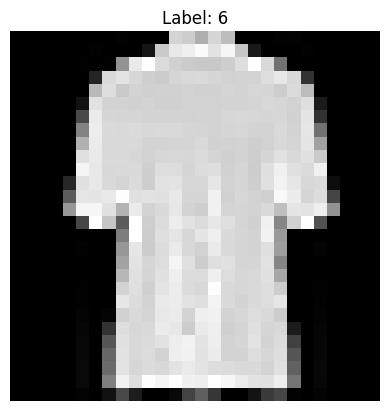

In [18]:
plt.imshow(sample, cmap='gray')
plt.title(f"Label: {y_train[sample_index]}")
plt.axis('off')
plt.show()


#### Rename the labels (class_names) 
#### from (0,1,2,3...,9) to ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### Plot some images showing the new label

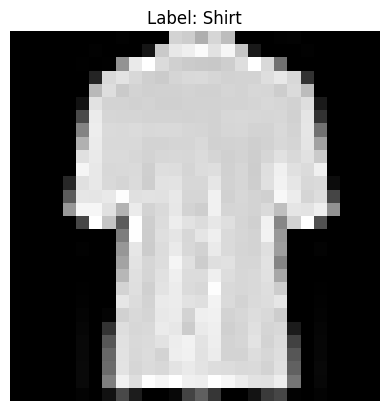

In [26]:
plt.imshow(sample, cmap='gray')
plt.title(f"Label: {class_names[y_train[sample_index]]}")
plt.axis('off')
plt.show()


## Convolutional Neural Network in Keras

### Preprocess data

- Reshape the imanges (X_train and X_valid) to the original 28x28-pixel format. 
  - You should have four parameters: (number of availabe values, 28, 28, and the digit that represents the number of colors).
- Also, use the astype() method to specify the data type as ('float32') to convert the pixel darknesses from integers into single-precision float values for both X_train and X_valid.

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32') / 255


### Convert the pixel intergers to floats by dividing the variables X_train and X_valid by 255

In [34]:
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255


### Convert the label y (y_train,y_valid) from integers into one-hot encodings
n_classes = 10 <br> for y_train and y_valid, use tf.keras.utils.to_categorical

In [37]:
import tensorflow as tf


n_classes = 10


y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, n_classes)


### Design the Convolutional Neural Network architecture

- Create a Sequential model and call it "model"
- For the first convolutional layer, use the add() method with 32 filters, kernel_size of 3x3, activation relu, and the correct input shape with three parameters (28,28,1).
- For the second convolutional layer, use the add() method with 64 filters, kernel_size of 3x3, and activation relu.
- Add MaxPooling2D with a pool size of (2x2) to reduce computational complexity.
- Add dropout 30% to reduce overfitting 
- Using Flatten, convert the three dimensional activation map output by conv2D() to a one dimensional array.
- add a dense hidden layer with 128 neurons with relu activation function
- and dropout of 40% 
- add an output layer with 10 neurons, n_classes = 10, and activation function softmax

In [42]:
from keras.layers import Input


model = Sequential()


model.add(Input(shape=(28, 28, 1)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.3))


model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dropout(0.4))


model.add(Dense(10, activation='softmax'))


### Display the summary of the model

In [44]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model with the followign parameters:
- loss="categorical_crossentropy"
- Optimizer adam
- Set the metrics to 'accuracy' to recieve feedbak on model accurancy

In [46]:
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])


### Train the model (model.fit) with the followign parameters:
- X_train 
- y_train 
- batch_size=64
- epochs=5 
- verbose=1 
- validation_data=(X_valid, y_valid))

In [48]:
history = model.fit(X_train, y_train, 
                    batch_size=64, 
                    epochs=5, 
                    verbose=1, 
                    validation_data=(X_valid, y_valid))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5220 - loss: 1.3114 - val_accuracy: 0.7635 - val_loss: 0.6204
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7616 - loss: 0.6385 - val_accuracy: 0.7976 - val_loss: 0.5542
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7841 - loss: 0.5829 - val_accuracy: 0.8066 - val_loss: 0.5353
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7885 - loss: 0.5717 - val_accuracy: 0.8179 - val_loss: 0.4954
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7955 - loss: 0.5485 - val_accuracy: 0.8241 - val_loss: 0.4827


#### Plot the Model loss

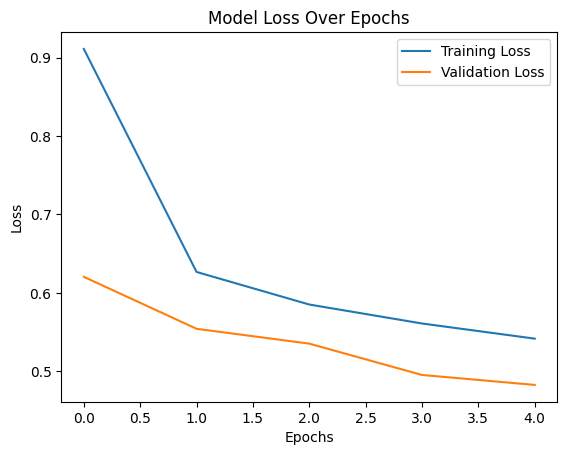

In [51]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluate the model (loss and accuracy)

In [53]:
loss, accuracy = model.evaluate(X_valid, y_valid)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.4785
Validation Loss: 0.4826689064502716
Validation Accuracy: 0.8241000175476074


### Create a function to prin the confusion matrix
#### Feel free to use the code form your first lab, the one below, or your own code. 

### Import Libraries   
- From collections input Counter
- Import confusion_matrix from sklearn
- import itertoos

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


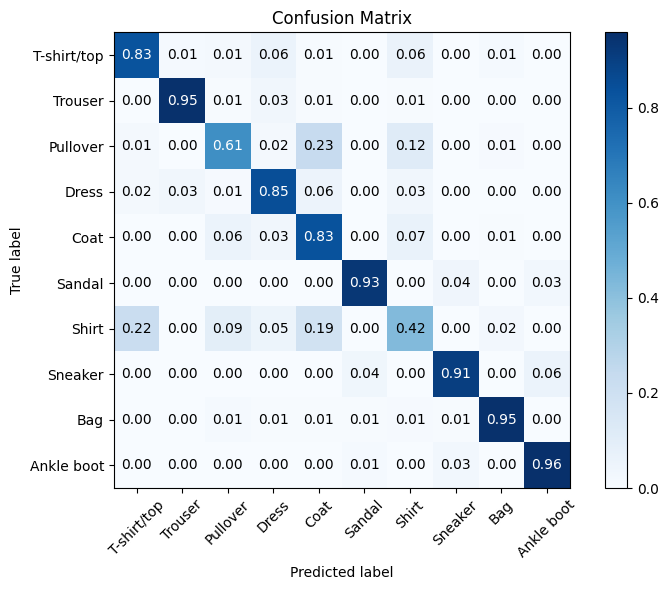

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


y_pred = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_confusion_matrix(y_valid.argmax(axis=1), y_pred_classes, class_names, normalize=True)


#### For the confusion matrix, define a function:

def plot_confusion_matrix(cm, classes,<br>
                          normalize=False,<br>
                          title='Confusion matrix', <br>
                          cmap=plt.cm.Blues):

In [57]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observacion')
    plt.xlabel('Prediccion')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


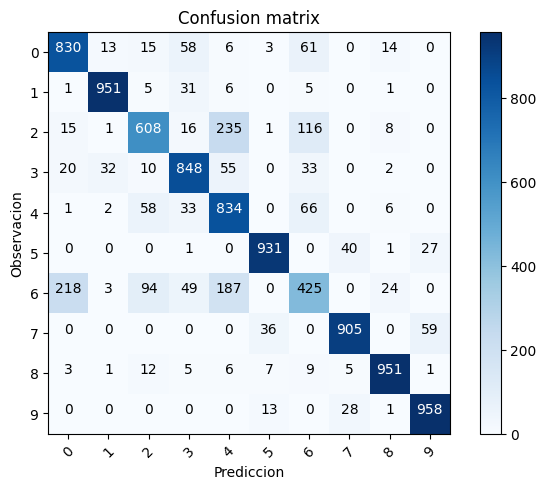

In [59]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#### Review the value of accuracy that you obtained in the first assignment (Using a Shallow Neural Network) and compare it to the value obtained using the Convolutional Neural Network. 
### What model performed better CNN or ANN?

CNNs are usually better than ANNs for image classification because they’re designed to capture spatial patterns in images. With convolutional layers, CNNs can automatically learn features like edges and shapes, making them more efficient and accurate for tasks like this. ANNs, on the other hand, treat images as flat data and struggle with spatial relationships, which can lead to lower accuracy. CNNs also have fewer parameters, reducing overfitting and improving performance. So, for something like Fashion MNIST, CNNs will typically perform better than ANNs.

#### Add a variable called predictions = model.predict(X_valid)

In [64]:
predictions = model.predict(X_valid)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


#### Using X_valid, reshape, and a for loop, find out how many incorrect predictions are. Store them in a variable called: <br>incorrect_predictions = [ ]

In [68]:
images = X_valid.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_valid)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

#### Print the length of (incorrect_predictions)

In [71]:
images = X_valid.reshape((10000, 28, 28))


incorrect_predictions = []


for i, (p, e) in enumerate(zip(predictions, y_valid)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))


print(f"Number of incorrect predictions: {len(incorrect_predictions)}")


Number of incorrect predictions: 1759


#### Plot the incorrect predictions

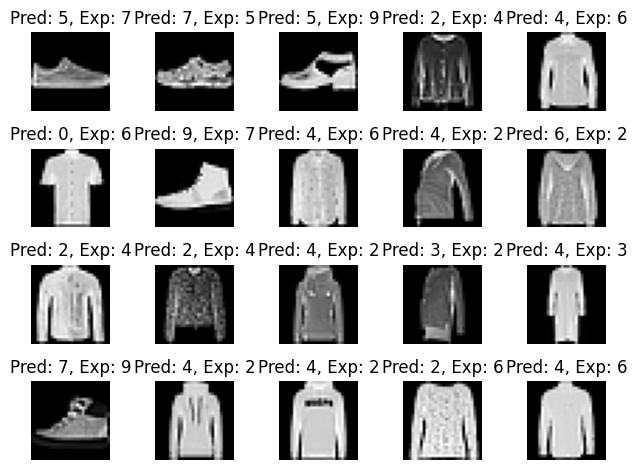

In [75]:
import matplotlib.pyplot as plt


num_to_display = 20  


for i in range(num_to_display):
    index, image, predicted, expected = incorrect_predictions[i]
    
    
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {predicted}, Exp: {expected}")
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Save your model as fashionmnist_cnn.keras

In [77]:
model.save('fashionmnist_cnn.keras')
